# Hotel Builder GA

You are the owner of a hotel company based in Los Angeles. You want to expand your business into San Francisco over the next 40 years. You know that it takes you 2 years to build a hotel and the city <u>does not allow you to build more than one hotel at a time</u>. 

Your Revenue in any year is given by the function $R(h)$ where $h$ is the number of hotels that are currently built (must be completed):

$$ R(h)=   \left\{
\begin{array}{ll}
      1500 + 100h - 5h^2 & h>0 \\
      0 & h = 0 \\
\end{array} 
\right.  $$

Each year your have to pay to run and maintain your completed hotels. The cost function $C(h)$ is:

$$ C(h) = 15 h$$

The cost to build a hotel is not fixed, it changes based on the year $y$ it's build is completed. The One-time Cost that is payed when you build a hotel and is represented by the function:

$$B(y) = 1000 \frac{y + 5}{2y} $$

<b>Use a genetic algorithm to determine the optimal building strategy for your company.</b>

In [5]:
import random
import numpy as np 
import matplotlib.pyplot as plt


def profit_h(h):
    revenue=1500+100*h-5*h**2
    cost=15*h
    return revenue-cost 

def cost_build(y):
    cost_build= 1000*(y+5)/(2*y)
    return cost_build 

def build_cost(solution):
    cost=0
    for i in range(len(solution)):
        cost+= solution[i] * (1000* ((i+1)+5)/(2*(i+1)))
        
    return cost 

def build_hotel(build_time,periods):
    build_prob=0.9
    strategy = []
    remaining_build_years=0
    for n in range(periods):
        if remaining_build_years == 0 and n + build_time <= periods:
            if random.random() < build_prob:
                remaining_build_years = build_time
        new_hotel = 0
        if remaining_build_years == 1:
            new_hotel = 1
        remaining_build_years = max(0, remaining_build_years - 1)
        strategy.append(new_hotel)
    return strategy 

def strat_hotel(strategy):
    hotel_list=[0]
    for i in range(1,len(strategy)):
        hotel_list.append(hotel_list[i-1]+strategy[i])
    return hotel_list

def fitness(strategy):
    hotel_list=strat_hotel(strategy)
    profit=0
    for h in hotel_list:
        profit+=(profit_h(h))
    build_c=build_cost(strategy)
    fitness=profit-build_c
    for i in range(1,len(strategy)):
        if strategy[i]==1 and strategy[i-1]==1:
            fitness=-99999
    
        
    return fitness




In [40]:
random.choice([0,1])

0

In [43]:

#Generate N solutions 

#generate population
'''def gen_n_population(n,build_time,periods):
  solutions=[build_hotel(build_time,periods) for _ in range(n)]
  return solutions '''
def gen_n_population(n,build_time,periods):
  solutions=[ [random.choice([0,1]) for _ in range(periods)] for _ in range(n)]
  return solutions 

#crossover 

def crossover(p1,p2):
  random_ind=random.choice(range(len(p1)))
  c1= p1[:random_ind]+p2[random_ind:]
  c2= p2[:random_ind]+p1[random_ind:]
  return [c1,c2]

#return the selected parents 
def roullette_selection(population, num_parents):
  selected= random.sample(population,k=num_parents)

  crossed=crossover(selected[0],selected[1])
  mutated= [ mutation(x,0.02) for x in crossed]

  return mutated


def mutation(inp_solution,mu):
  mutated = [abs(x-1) if random.random()<mu else x for x in inp_solution ]
  return mutated

def choose_m_children(population,m):
  children= [roullette_selection(population,2)[0] for x in range(m)]

  return children


def winner(s1,s2):
  val_s1= fitness(s1)
  val_s2= fitness(s2)
  return s1 if val_s1 > val_s2 else s2

def tournament_survival(population,N):
  new_pop=[]
  for i in range(N):
    s=random.sample(population,k=2)
    new_pop.append(winner(s[0],s[1]))
  return new_pop

Fitness of final generation's first member is:
65858.83227883228
Yearly Hotel Count list of final generation's first member is:
[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
List of number of hotels in final generation is:
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


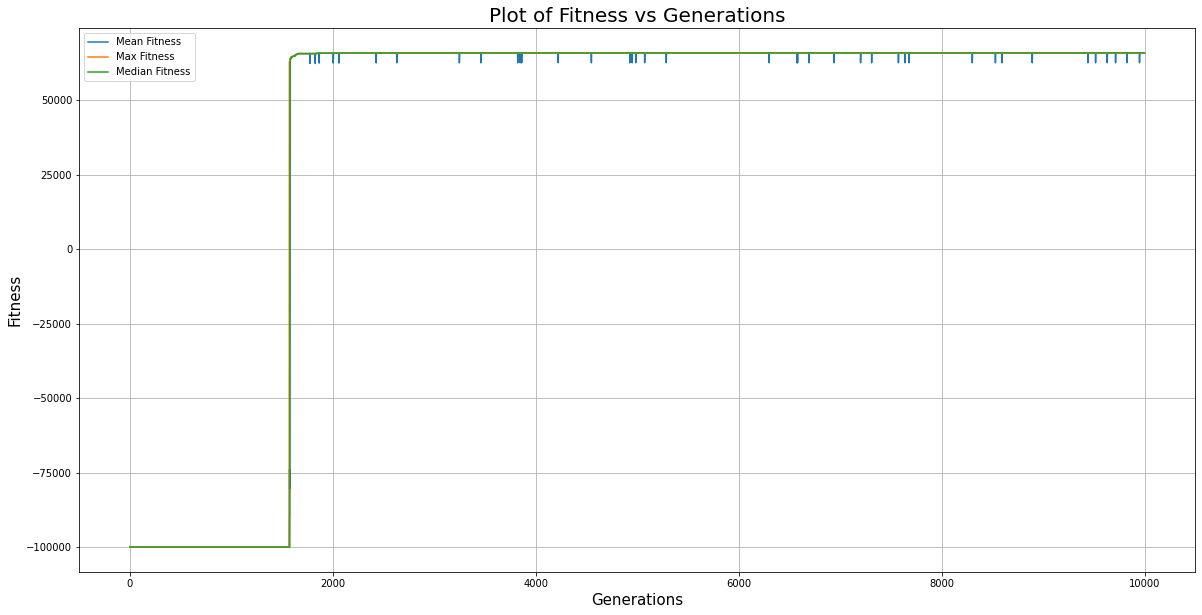

In [44]:
# hotel problem parameters
build_time=2
periods=40
population_size=50
children=4
generations=10000

all_generations=[]
fitness_all=[]
population=gen_n_population(population_size,build_time,periods)

for i in range(generations):
  if i ==0: 
    new_gen=population
  all_pop=new_gen+choose_m_children(new_gen,children)
  new_gen=tournament_survival(all_pop,population_size)
  fitness_all.append([fitness(x) for x in new_gen])
  all_generations.append(new_gen)

print("Fitness of final generation's first member is:")
print(fitness(all_generations[-1][0]))

print("Yearly Hotel Count list of final generation's first member is:")
print(strat_hotel(all_generations[-1][0]))

print("List of number of hotels in final generation is:")
print([sum(x) for x in all_generations[-1]])

fitness_all_mean = [np.mean(fitness) for fitness in fitness_all]
fitness_all_max = [np.max(fitness) for fitness in fitness_all]
fitness_all_min = [np.median(fitness) for fitness in fitness_all]

plt.figure(figsize=(20,10))
plt.grid()
plt.plot(list(range(generations)), fitness_all_mean, label = 'Mean Fitness')
plt.plot(list(range(generations)), fitness_all_max, label = 'Max Fitness')
plt.plot(list(range(generations)), fitness_all_min, label = 'Median Fitness')

plt.title('Plot of Fitness vs Generations',fontsize=20)
plt.legend()

plt.xlabel('Generations', fontsize=15)
plt.ylabel('Fitness', fontsize=15)
plt.show()


In [11]:
print(all_generations[-1][0])


[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


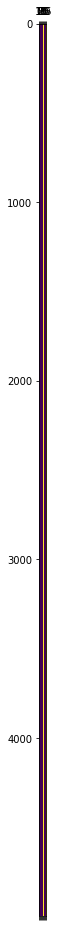

In [30]:
import matplotlib.pyplot as plt


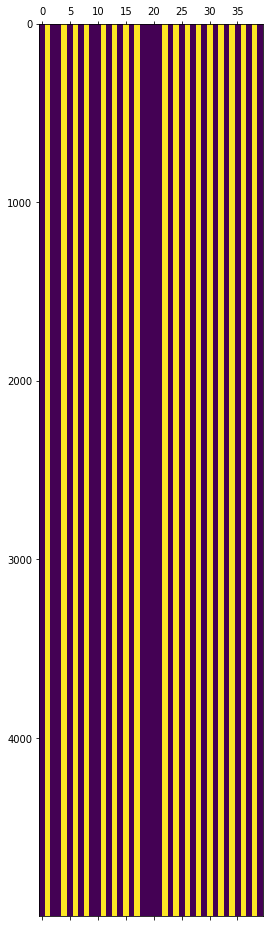

In [32]:
progress=[]
for i in range(len(all_generations)):
    progress.append(all_generations[1][3])

plt.matshow(progress,aspect='auto')

In [35]:
print(all_generations[1][2])

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
